In [1]:
import pandas as pd
from PIL import Image
import os
import shutil

# Đọc file CSV chứa thông tin góc xoay
df = pd.read_csv('GocXoay_7.3_VoVanChucNien_21SE4_tayall.csv')

# Kiểm tra lại tên các cột
print(df.columns)

# Đổi tên các cột để dễ dàng truy cập
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={
    'Số thứ tự': 'STT',
    'Folder': 'Folder',
    'ID': 'ID',
    'Tay\nT (trái)/\nP (phải)/\n2 (cả 2 tay)': 'Hand',
    'N (Bàn tay bình thường)\nA (Anomaly Bàn tay bị bất bình thường như: bị dị tật, cụt ngón tay … cần phải loại)': 'Type',
    'Góc xoay (bao nhiêu độ) để hướng từ cổ tay đến ngón tay giữa hướng lên trên (chỉ thực hiện đối với ảnh tay trái, tay phải, file giữ nguyên thì góc xoay là 0, không thực hiện với ảnh 2 bàn tay và ảnh bị loại)': 'Angle',
    'Mau nen gan nhat xung quanh ban tay\nD (Đen)/ \nT (Trắng)': 'BackgroundColor'
}, inplace=True)

# Kiểm tra lại tên các cột sau khi đổi tên
print(df.columns)

# Đường dẫn đến thư mục chứa ảnh X-quang
image_dir = r"D:\Project_VSCode_Python\hoc_may_gk_cuoi\image"

# Tạo thư mục để lưu ảnh đã xoay
output_dir = r"D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu"
os.makedirs(output_dir, exist_ok=True)

# Kiểm tra xem ảnh có tồn tại không
def check_image_exists(img_path):
    if not os.path.exists(img_path):
        print(f"Ảnh không tồn tại: {img_path}")
        return False
    return True

# Xử lý từng ảnh dựa trên thông tin trong file CSV
for index, row in df.iterrows():
    stt = row['STT']
    angle = row['Angle']
    img_id = row['ID']
    
    # Kiểm tra nếu góc là 'L' hoặc 'Hai Tay' thì bỏ qua
    if angle in ['L', 'Hai Tay']:
        print(f"Đã bỏ qua việc xoay ảnh {img_id} với góc {angle}")
        # Copy ảnh gốc sang thư mục output_dir
        img_path = os.path.join(image_dir, f'{img_id}.png')
        output_path = os.path.join(output_dir, f'{img_id}.png')
        shutil.copyfile(img_path, output_path)
        continue
    
    # Chuyển angle thành số
    try:
        angle = float(angle)
    except ValueError:
        print(f"Góc không hợp lệ cho ảnh {img_id}: {angle}")
        continue
    
    # Đường dẫn đến ảnh gốc
    img_path = os.path.join(image_dir, f'{img_id}.png')  # Giả sử ảnh là .png, nếu không thì thay bằng đuôi tương ứng
    
    # Kiểm tra ảnh có tồn tại không
    if not check_image_exists(img_path):
        continue
    
    # Đọc ảnh
    try:
        image = Image.open(img_path)
    except IOError:
        print(f"Không thể đọc ảnh {img_path}")
        continue
    
    # Xoay ảnh
    rotated_image = image.rotate(angle, expand=True)
    
    # Lưu ảnh đã xoay
    output_path = os.path.join(output_dir, f'{img_id}.png')
    rotated_image.save(output_path)

    print(f"Đã xoay và lưu ảnh {img_id} tại {output_path}")


Index(['Số thứ tự', 'Folder', 'ID', 'Tay\nT (trái)/\nP (phải)/\n2 (cả 2 tay)',
       'N (Bàn tay bình thường)\nA (Anomaly Bàn tay bị bất bình thường như: bị dị tật, cụt ngón tay … cần phải loại) ',
       'Góc xoay (bao nhiêu độ) để hướng từ cổ tay đến ngón tay giữa hướng lên trên (chỉ thực hiện đối với ảnh tay trái, tay phải, file giữ nguyên thì góc xoay là 0, không thực hiện với ảnh 2 bàn tay và ảnh bị loại)',
       'Mau nen gan nhat xung quanh ban tay\nD (Đen)/ \nT (Trắng) '],
      dtype='object')
Index(['STT', 'Folder', 'ID', 'Hand', 'Type', 'Angle', 'BackgroundColor'], dtype='object')
Đã xoay và lưu ảnh 12693 tại D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu\12693.png
Đã xoay và lưu ảnh 12694 tại D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu\12694.png
Đã xoay và lưu ảnh 12696 tại D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu\12696.png
Đã xoay và lưu ảnh 12697 tại D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu\12697.png
Đã xoay và lưu ảnh 12698 tại D:\Project_

In [2]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import math

# Đọc dữ liệu từ CSV
label_df = pd.read_csv('TayTraiPhai2_7.3_VoVanChucNien_21SE4_tayall.csv')

# Đường dẫn thư mục chứa ảnh đã xoay
rotated_image_dir = r"D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_luu"

# Dữ liệu và nhãn
X = []  # Dữ liệu (ảnh)
y = []  # Nhãn

# Duyệt qua các ảnh đã xoay trong thư mục
for filename in os.listdir(rotated_image_dir):
    if filename.endswith(".png"):
        # Lấy số thứ tự ảnh từ tên file
        img_id = filename.split("_")[0]  # Lấy phần trước dấu "_"
        
        # Loại bỏ phần mở rộng ".png" để chỉ lấy số thứ tự
        img_id = img_id.split(".")[0]
        
        # Tìm nhãn của ảnh trong label_df
        img_label_row = label_df[label_df['ID'] == int(img_id)]  # Chuyển đổi sang kiểu int
        if not img_label_row.empty:
            # Cập nhật tên cột chính xác dựa trên tên cột in ra
            img_label = img_label_row.iloc[0]['Tay\nT (trái)/\nP (phải)/\n2 (cả 2 tay)']
            
            # Đọc ảnh và thêm vào danh sách
            img_path = os.path.join(rotated_image_dir, filename)
            try:
                image = Image.open(img_path)
                X.append(image)
                y.append(img_label)
            except:
                print(f"Lỗi khi đọc ảnh {filename}")
        else:
            print(f"Không tìm thấy nhãn cho ảnh {filename}")

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chức năng đảm bảo mảng hình ảnh đúng định dạng
def ensure_image_format(image):
    if not isinstance(image, np.ndarray):
        image = np.array(image)  # Chuyển đổi sang mảng numpy nếu chưa phải
    if image.ndim != 2:
        raise ValueError("Hình ảnh không phải là mảng 2 chiều")
    return image

# Chuyển đổi các đối tượng Hình ảnh PIL thành mảng numpy và làm phẳng hình ảnh
X_train_flat = np.array([ensure_image_format(image.resize((100, 100))).flatten() for image in X_train])
X_test_flat = np.array([ensure_image_format(image.resize((100, 100))).flatten() for image in X_test])


In [3]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = rf.predict(X_test_flat)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của Random Forest trên tập kiểm tra: {accuracy:.2f}")

# Dự đoán nhãn cho tập huấn luyện
y_pred_train = rf.predict(X_train_flat)

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Độ chính xác của Random Forest trên tập huấn luyện: {accuracy_train:.2f}")



Độ chính xác của Random Forest trên tập kiểm tra: 0.98
Độ chính xác của Random Forest trên tập huấn luyện: 1.00


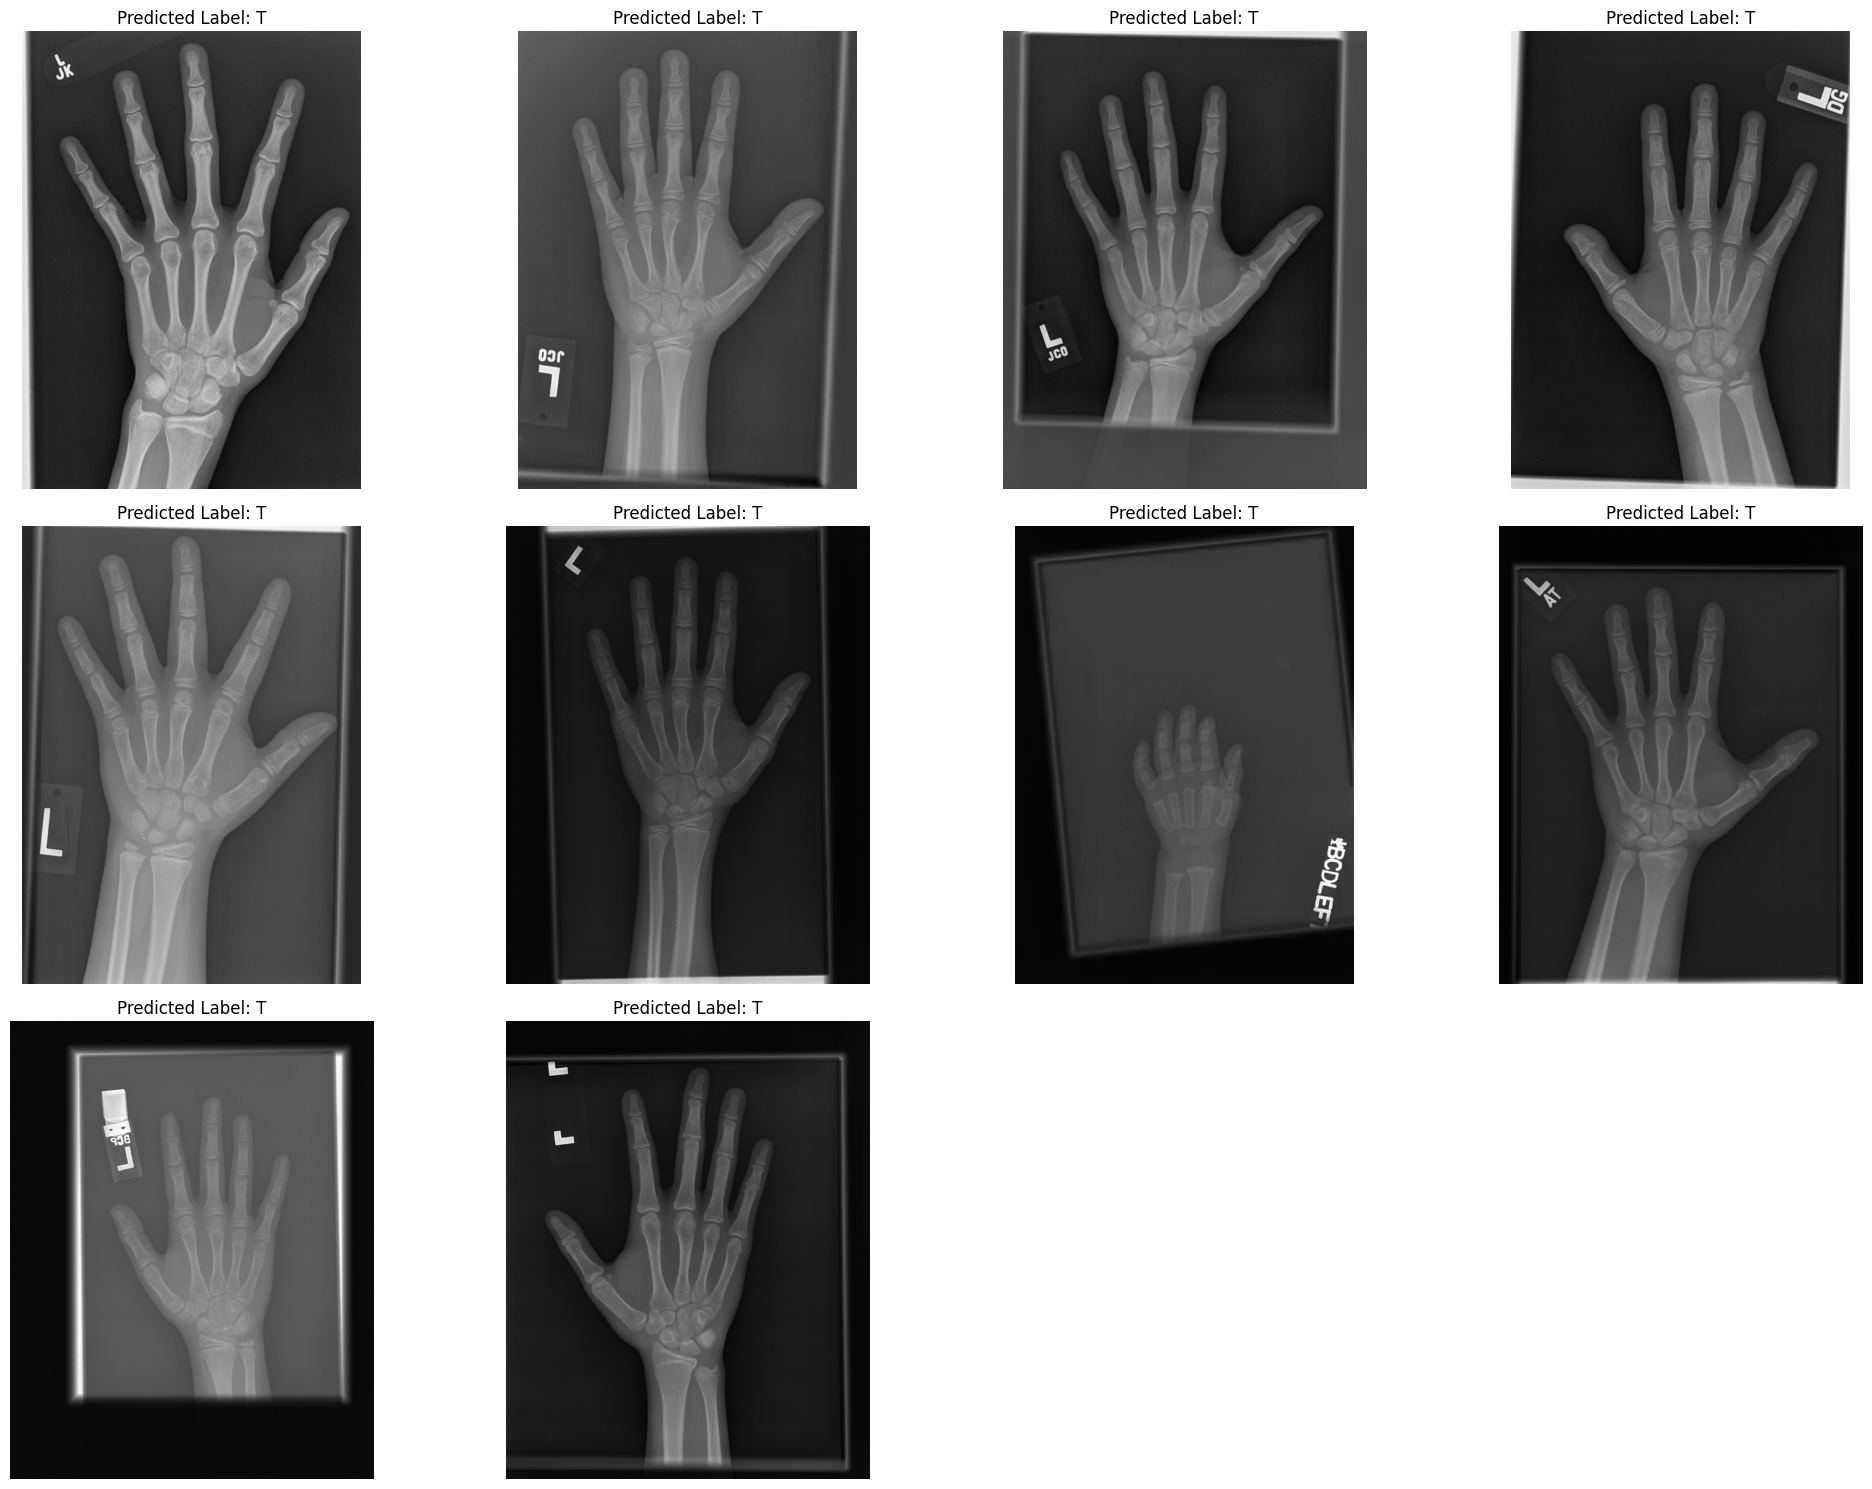

In [4]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Đoạn code xử lý dữ liệu ảnh từ thư mục mới
new_image_dir = r"D:\Project_VSCode_Python\hoc_may_gk_cuoi\image_test_moi"

X_new = []

for filename in os.listdir(new_image_dir):
    if filename.endswith(".png"):
        # Đọc và xử lý ảnh
        img_path = os.path.join(new_image_dir, filename)
        try:
            image = Image.open(img_path)
            # Thực hiện các xử lý cần thiết trên ảnh (nếu có)
            X_new.append(image)
        except Exception as e:
            print(f"Lỗi khi đọc ảnh {filename}: {str(e)}")

# Kiểm tra và xử lý nếu không có ảnh nào được đọc thành công
if len(X_new) == 0:
    print("Không có file ảnh hợp lệ trong thư mục new_image_dir.")
else:
    # Chuẩn bị dữ liệu cho mô hình (nếu cần)
    X_new_flat = np.array([np.array(image.resize((100, 100))).flatten() for image in X_new])

    # Reshape X_new_flat thành mảng 2 chiều
    X_new_flat = X_new_flat.reshape(len(X_new_flat), -1)

    # Dự đoán nhãn cho dữ liệu mới sử dụng mô hình RandomForest đã huấn luyện (rf)
    y_new_pred = rf.predict(X_new_flat)

    # Hiển thị các ảnh từ dữ liệu mới kèm nhãn dự đoán
    num_images = len(X_new)
    num_cols = 4  # Số cột hiển thị là 4 ảnh mỗi dòng
    num_rows = (num_images + num_cols - 1) // num_cols  # Tính số dòng dựa trên số lượng ảnh và số cột

    plt.figure(figsize=(20, 5 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(X_new[i], cmap='gray')  # Hiển thị ảnh
        plt.title('Predicted Label: ' + str(y_new_pred[i]))  # Hiển thị nhãn dự đoán
        plt.axis('off')
    plt.tight_layout()
    plt.show()
